<font size=5><center>Assessment of air quality associated with socioeconomic status in China</center >
<br>
<font size=4><center>By Wenyuan Cui and Hao Wu</center >


# 1. Introduction

<font size=4>What is air pollution and what causes it?

Due to a rapid economic development, industrial expansion and urbanization during the last few decades in China,there has been a sharp increase in energy consumption.This staggering increase in energy consumption accompanied with lax environmental regulations has led to the release of pollutants into the air that are detrimental to human health and the planet as a whole.The increasingly occurrence of haze or smog episodes characterized by the PM2.5, PM10, sulfur dioxide (SO2), ozone (O3), carbon monoxide (CO) and nitrogen dioxide (NO2) levels and reduced visibility has been reported in national-scale China especially in the most developed and high-populated city clusters such as Beijing, Shanghai, Chengdu ,Wuhan and Kunming. Some research show that the energy consumptions keep high levels in the developed cities in China, which will accelerate the emission of air polltants such as sulfur dioxide and carbon dioxide into the air. 

<font size=4>Why the air quality analysis matters?

According to a report published earlier this year by the World Health Organisation, air pollution now kills approximately seven million people annually, worldwide. This accounts for as much as one in eight deaths, and is by far the single biggest environmental health risk. In order to  take action to clean up air in China, it’s important to first understand where the pollution is most concentrated, how it occurs, what elements are involved. By completely understanding the reasons behind air pollution, we can not only actively avoid overly contaminated areas in our daily routines but also try to implement measures to curb such pollution.

<font size=4>What benefits this project can provide to the society, organizations, or individuals.

This project can provide the insights into the air quality and pollutants with the Gross Domestic Product (GDP) and energy consumption (coal and petrol) in China. It is important for our governments and some environmental protection agencies for helping them draw up better policies and measures such as pollutant emission standard. In this way, the lifehood of the people will be improved and the risk of diabetes, heart disease, and several cancers will be reduced.

<font size=4>Major work

The major study consists (1) the occurrence length and percentage of air quality index in over three hundred Chinese cities from 2015-2017; (2) the distribution and trends of different air pollutants for major regions in four seasons; (3) the influence of different air pollutants on air quality index by regression analysis; (4) linking the air quality with the amount of energy consumed and Gross Domestic Product (GDP) through time series method; (5) predicting the trends of air quality index in the early 2018 based on past datasets. 
The overall manuscripts are organized as follows. The first part is the introduction of the air pollution in China. The second part provides the data information and analyses on descriptive statistics on the percentage and duration of different air pollutants concentration ranges. The third portion compares features such as the mean concentration, 25th and 50th percentiles, variance,etc with the change of time. At last,  the regression analysis and prediction will be performed according to extracted features from the datasets. 

# 2. Data Source and Collection

The air quality and pollutants datasets are collected from PM2.5.in (http://pm25.in/) updated daily. The data source is measured from China National Environmental Monitoring Station of the national city air quality real-time release platform.（http://www.cnemc.cn/sssj2092874.jhtml）

The time period for the data is between January 2015 to December 2017. Missing data are denoted as NA. The sample size is 450 MB.

- NO1: row number
- NO2: column number (city names)
- year: year of data in this row
- month: month of data in this row
- day: day of data in this row
- hour: hour of data in this row
- PM2.5: PM2.5 concentration (mg/m^3)
- PM2.5_24h: PM2.5 concentration 24 hourly average (mg/m^3)
- PM10: PM10 concentration (mg/m^3)
- PM10_24h: PM10 concentration 24 hourly average (mg/m^3)
- AQI: air quality index real time value
- SO2: sulfur dioxide real time concentration (mg/m^3)
- SO2_24h: sulfur dioxide 24 hourly average (mg/m^3)
- NO2: nitrogen dioxide real time concentration (mg/m^3)
- NO2_24h: nitrogen dioxide 24 hourly average (mg/m^3)
- O3: ozone real time concentration (mg/m^3)
- CO: carbon monoxide real time concentration (mg/m^3)
- CO_24h: carbon monoxide 24 hourly average(mg/m^3)

The data is obtained from the websites as follows: http://beijingair.sinaapp.com/


# 3. Data manipulation

The datasets are collected on each month and the monthlyl datasets are generated into one file for 2015, 2016 and 2017.
Five target cities with the variables and datetime information are extracted from the datasets. 
Missing values are filled with the mean of the corresponding columns. 

In [252]:
# import modules
import pandas as pd
import numpy as np
import dateutil
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale
import statsmodels.api as sm
from sklearn import model_selection

In [10]:
# The datasets are collected based on each month. Put the monthly datasets into one file called 2015.csv
# Repeat the procedure for 2016 and 2017
file_name = 'airquality2015{}.csv'
df_list=[]
for i in range(1,13):
    df_list.append(pd.read_csv(file_name.format(i)))
df = pd.concat(df_list)
df.to_csv('airquality2015.csv')

In [10]:
# Convert the date to datetime 
dat2015 = pd.read_csv('airquality2015.csv')
dat2015['date'] = dat2015['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [11]:
# Extract the Year, Month and Day information and put them into new columns
dat2015['year'],dat2015['month'],dat2015['day'] = dat2015['date'].dt.year,dat2015['date'].dt.month,dat2015['date'].dt.day

In [13]:
# Select the five representative Chinese cities, Date, Pollution type information 
dat2015 = dat2015[['year','month','day','hour','type','beijing','shanghai','chengdu','wuhan','kunming']]
dat2015.columns = ['Year','Month','Day','Hour','Type','Beijing','Shanghai','Chengdu','Wuhan','Kunming']
dat2015.head()

,Year,Month,Day,Hour,Type,Beijing,Shanghai,Chengdu,Wuhan,Kunming
0,2015,1,2,0,AQI,NaN,NaN,NaN,NaN,NaN
1,2015,1,2,0,PM2.5,NaN,NaN,NaN,NaN,NaN
2,2015,1,2,0,PM2.5_24h,NaN,NaN,NaN,NaN,NaN
3,2015,1,2,0,PM10,NaN,NaN,NaN,NaN,NaN
4,2015,1,2,0,PM10_24h,NaN,NaN,NaN,NaN,NaN


In [14]:
dat2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122820 entries, 0 to 122819
Data columns (total 10 columns):
Year        122820 non-null int64
Month       122820 non-null int64
Day         122820 non-null int64
Hour        122820 non-null int64
Type        122820 non-null object
Beijing     119813 non-null float64
Shanghai    122536 non-null float64
Chengdu     122775 non-null float64
Wuhan       122435 non-null float64
Kunming     122766 non-null float64
dtypes: float64(5), int64(4), object(1)
memory usage: 9.4+ MB


In [20]:
# Replace the NaN in dat2015
dat2015=dat2015.dropna()
dat2015.to_csv('airquality2015.csv')
dat2015.head()

,Year,Month,Day,Hour,Type,Beijing,Shanghai,Chengdu,Wuhan,Kunming
15,2015,1,2,1,AQI,114.0,75.0,184.0,119.0,67.0
16,2015,1,2,1,PM2.5,85.0,54.0,138.0,89.0,48.0
17,2015,1,2,1,PM2.5_24h,45.0,37.0,137.0,48.0,59.0
18,2015,1,2,1,PM10,137.0,81.0,208.0,168.0,63.0
19,2015,1,2,1,PM10_24h,73.0,75.0,211.0,124.0,71.0


# 4. Data Summary and Visualization 

<font size=4>4.1 Refined dataset information

Combie 2015,2016 and 2017 datasets into one master files containing the information for further analysis. 
The master dataset is shown below containing the Year, Month, Day, Hour, air pollutant type and five major cities. 

In [2]:
# Combine 2015,2016 and 2017 datasets into one master file
dat = pd.read_csv('AirqualityMaster.csv')
dat.head()

,Year,Month,Day,Hour,Type,Beijing,Shanghai,Chengdu,Wuhan,Kunming
0,2017.0,1.0,1.0,0.0,AQI,451.0,69.0,230.0,161.0,63.0
1,2017.0,1.0,1.0,0.0,PM2.5,425.0,49.0,179.0,122.0,32.0
2,2017.0,1.0,1.0,0.0,PM2.5_24h,292.0,48.0,137.0,112.0,31.0
3,2017.0,1.0,1.0,0.0,PM10,493.0,64.0,296.0,194.0,73.0
4,2017.0,1.0,1.0,0.0,PM10_24h,343.0,70.0,228.0,163.0,69.0


The information of the dataset is presented with the data size of 28.9 MB and over 370K oberservations. 

In [4]:
# Present the information of the dataset
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378948 entries, 0 to 378947
Data columns (total 10 columns):
Year        378885 non-null float64
Month       378885 non-null float64
Day         378885 non-null float64
Hour        378885 non-null float64
Type        378885 non-null object
Beijing     378948 non-null float64
Shanghai    378948 non-null float64
Chengdu     378948 non-null float64
Wuhan       378948 non-null float64
Kunming     378948 non-null float64
dtypes: float64(9), object(1)
memory usage: 28.9+ MB


<font size=4>4.2 Air quality index (AQI) across time

Since air quality index (AQI) represents the overall air quality for each city, we conduct the statistical analysis for AQI in five cities. 
The summarized information is tabulated below. 

In [5]:
# Air Quality Index (AQI) represents the overall airquality of each city
# Summarize the AQI for the five cities from 2015-2017
dat_AQI = dat.loc[dat['Type'] == 'AQI',['Beijing','Shanghai','Chengdu','Wuhan','Kunming']]
dat_AQI.describe()

,Beijing,Shanghai,Chengdu,Wuhan,Kunming
count,25259.000000,25259.000000,25259.000000,25259.000000,25259.000000
mean,102.250597,73.786091,87.748936,89.899345,51.130756
std,80.627269,41.766403,49.484945,50.280651,19.607943
min,10.000000,13.000000,13.000000,10.000000,10.000000
25%,46.000000,45.000000,54.000000,58.000000,37.000000
50%,77.000000,62.000000,75.000000,80.000000,50.000000
75%,131.000000,89.000000,109.000000,110.000000,62.000000
max,500.000000,441.000000,430.000000,500.000000,193.000000


From the table above, it shows that Beijing has the highest AQI mean over the past three years among the five cities and its highest AQI spikes to 500. This means the air quality in Beijing is the worst among the five cities and could be harmful to people's health. However, Kunming has the lowest AQI mean of 51.13 and this indicates relative good air quality and less air pollutants. 

([<matplotlib.axis.XTick at 0xc5ccc50>,
 <a list of 3 Text xticklabel objects>)

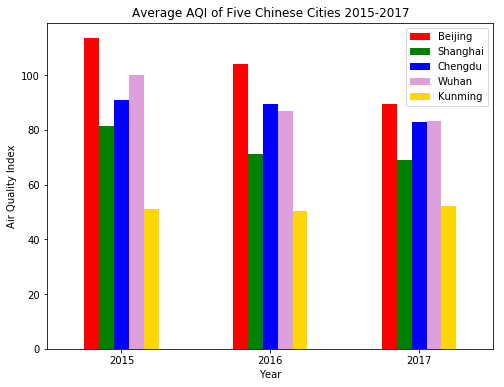

In [6]:
# Plot the trend of AQI of five cities in the past three years using bar chart
dat_AQI_Year = dat.loc[dat['Type'] == 'AQI',
                          ['Year','Beijing','Shanghai','Chengdu','Wuhan','Kunming']].groupby('Year').mean()
dat_AQI_Year.head()
dat_AQI_Year.plot(kind='bar',color = ['r','green','b','plum','gold'],figsize=(8,6),align = 'center')
plt.legend(('Beijing','Shanghai','Chengdu','Wuhan','Kunming'),bbox_to_anchor=(1, 1))
plt.title('Average AQI of Five Chinese Cities 2015-2017')
plt.xlabel('Year')
plt.ylabel('Air Quality Index')
plt.xticks(np.arange(3), ('2015', '2016', '2017'),rotation=0)

The overall AQI trend is decreasing for those five cities from 2015 to 2017. It is noticed that Beijing,Wuhan and Shanghai AQI have a remarkable decline in the past three years. This is because that the governement takes action in controlling vehicle population, reducing coal consumption and improving pollutants emission standard. Kunming has maintained a relative stable AQI level over the years. The reason is that Kunming targets a tourism city and little industry is allowed to develop. 

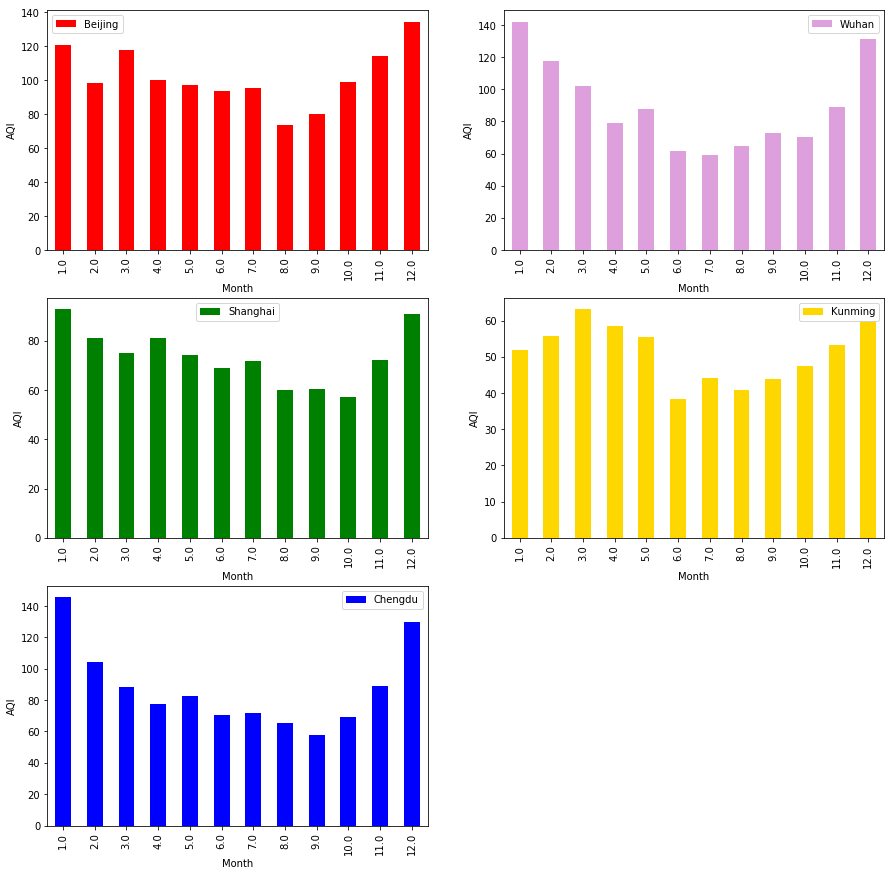

In [7]:
# AQI trend from January to December from 2015-2017
dat_AQI_Month = dat.loc[dat['Type'] == 'AQI',
                          ['Month','Beijing','Shanghai','Chengdu','Wuhan','Kunming']].groupby('Month').mean()
fig, axes = plt.subplots(3,2,figsize=(15,15))
dat_AQI_Month['Beijing'].plot(kind = 'bar',ax=axes[0,0],color='r');axes[0,0].set_ylabel('AQI');axes[0,0].legend()
dat_AQI_Month['Shanghai'].plot(kind = 'bar',ax=axes[1,0],color='g');axes[1,0].set_ylabel('AQI');axes[1,0].legend()
dat_AQI_Month['Chengdu'].plot(kind = 'bar',ax=axes[2,0],color='b');axes[2,0].set_ylabel('AQI');axes[2,0].legend()
dat_AQI_Month['Wuhan'].plot(kind = 'bar',ax=axes[0,1],color='plum');axes[0,1].set_ylabel('AQI');axes[0,1].legend()
dat_AQI_Month['Kunming'].plot(kind = 'bar',ax=axes[1,1],color='gold');axes[1,1].set_ylabel('AQI');axes[1,1].legend()
axes[2,1].set_visible(False)

It shows clear signs that five cities have the same distribution which AQI reaches higher level in winter and lower level in summer. This could be attributed to the coal consumption during the heating season in those Chinese cities. 

<font size=4>4.3 Review of PM2.5

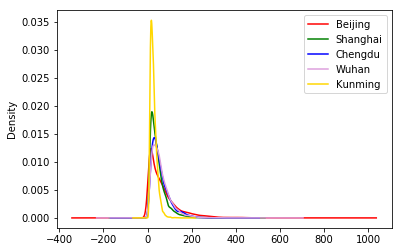

In [8]:
# PM2.5 density plot
dat_PM25 = dat.loc[dat['Type'] == 'PM2.5',['Beijing','Shanghai','Chengdu','Wuhan','Kunming']]
dat_PM25[['Beijing','Shanghai','Chengdu','Wuhan','Kunming']].plot(kind='kde',color = ['r','g','b','plum','gold'])

The density plot presents the distribution of PM2.5 for five cities. It can tell that Beijing has the largest range of PM2.5, which means that the variance of PM2.5 is the highest. Shanghai and Kunming have more uniform density distribution of PM2.5 and the fluctuations are more stable. 

It finds that Beijing has worse air quality based on the above analysis. Therefore, we explore the relationship between AQI and PM2.5 in Beijing.

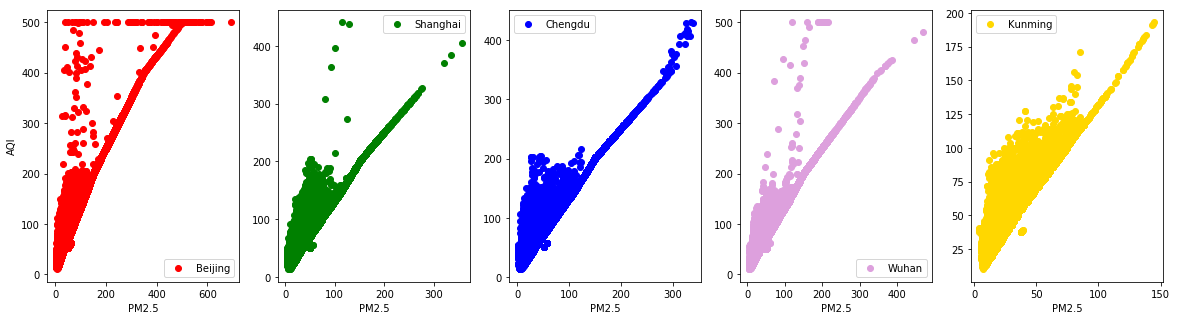

In [9]:
fig, axes = plt.subplots(1,5,figsize=(20,5))
a1 = plt.subplot(151)
a1.scatter(dat_PM25['Beijing'], dat_AQI['Beijing'],color='r');a1.set_ylabel('AQI');a1.set_xlabel('PM2.5');a1.legend()
a2 = plt.subplot(152)
a2.scatter(dat_PM25['Shanghai'], dat_AQI['Shanghai'],color='g');a2.set_xlabel('PM2.5');a2.legend()
a3 = plt.subplot(153)
a3.scatter(dat_PM25['Chengdu'], dat_AQI['Chengdu'],color='b');a3.set_xlabel('PM2.5');a3.legend()
a4 = plt.subplot(154)
a4.scatter(dat_PM25['Wuhan'], dat_AQI['Wuhan'],color='plum');a4.set_xlabel('PM2.5');a4.legend()
a5 = plt.subplot(155)
a5.scatter(dat_PM25['Kunming'], dat_AQI['Kunming'],color='gold');a5.set_xlabel('PM2.5');a5.legend()

In [249]:
# Draw a scatter plot with lowess smooth
g = sns.regplot(x="KM", y="Price", lowess=True, marker="+", 
                line_kws={"color":"r","alpha":0.5,"lw":3}, color = 'g', data=dat)

SyntaxError: positional argument follows keyword argument (<ipython-input-249-f6d4847bf426>, line 4)

<font size=4>4.4 Correlationship analysis

In [228]:
data = pd.read_csv('airquality2015.csv')
data['datetime']=data.Year.apply(str)+'-'+data.Month.apply(str)+'-'+data.Day.apply(str)+' '+data.Hour.apply(str)+':00:00' 
sub_dt = data[['datetime', 'Type', 'Beijing','Shanghai','Chengdu','Wuhan','Kunming']].copy()

In [236]:
sub_tt = sub_dt.pivot(index='datetime',columns= 'Type',values='Beijing')
sub_tt.head()

Type,AQI,CO,CO_24h,NO2,NO2_24h,O3,O3_24h,O3_8h,O3_8h_24h,PM10,PM10_24h,PM2.5,PM2.5_24h,SO2,SO2_24h
datetime,,,,,,,,,,,,,,,
2015-1-10 0:00:00,270.0,3.008,1.501,108.0,62.0,10.0,65.0,18.0,55.0,279.0,110.0,219.0,74.0,87.0,33.0
2015-1-10 10:00:00,206.0,4.333,2.200,98.0,73.0,9.0,65.0,8.0,55.0,190.0,129.0,155.0,113.0,64.0,46.0
2015-1-10 11:00:00,204.0,4.025,2.346,112.0,76.0,11.0,65.0,8.0,55.0,171.0,123.0,153.0,119.0,61.0,48.0
2015-1-10 12:00:00,185.0,3.367,2.468,111.0,80.0,19.0,65.0,9.0,55.0,175.0,127.0,139.0,124.0,53.0,50.0
2015-1-10 13:00:00,161.0,2.650,2.562,104.0,84.0,27.0,65.0,12.0,55.0,141.0,144.0,122.0,129.0,50.0,51.0


In [237]:
sub_tt.corr(method='pearson')

Type,AQI,CO,CO_24h,NO2,NO2_24h,O3,O3_24h,O3_8h,O3_8h_24h,PM10,PM10_24h,PM2.5,PM2.5_24h,SO2,SO2_24h
Type,,,,,,,,,,,,,,,
AQI,1.000000,0.759055,0.637495,0.704875,0.688004,-0.090208,-0.049888,-0.092378,-0.077975,0.936179,0.768943,0.956618,0.772713,0.511101,0.487675
CO,0.759055,1.000000,0.812612,0.756771,0.704109,-0.344545,-0.327597,-0.353358,-0.345512,0.686094,0.589549,0.822751,0.666606,0.551602,0.519419
CO_24h,0.637495,0.812612,1.000000,0.585073,0.819256,-0.294550,-0.360126,-0.338199,-0.388422,0.585880,0.693372,0.687337,0.843744,0.443919,0.595626
NO2,0.704875,0.756771,0.585073,1.000000,0.752422,-0.499295,-0.291469,-0.396390,-0.305950,0.678194,0.509472,0.763575,0.552775,0.612583,0.541177
NO2_24h,0.688004,0.704109,0.819256,0.752422,1.000000,-0.308684,-0.324038,-0.363908,-0.373674,0.656447,0.700873,0.721586,0.815078,0.570411,0.706912
O3,-0.090208,-0.344545,-0.294550,-0.499295,-0.308684,1.000000,0.682224,0.811626,0.656456,-0.105601,-0.085476,-0.183347,-0.148359,-0.216125,-0.249786
O3_24h,-0.049888,-0.327597,-0.360126,-0.291469,-0.324038,0.682224,1.000000,0.758527,0.977658,-0.065832,-0.069484,-0.117547,-0.127655,-0.286336,-0.318292
O3_8h,-0.092378,-0.353358,-0.338199,-0.396390,-0.363908,0.811626,0.758527,1.000000,0.766709,-0.093113,-0.095184,-0.197900,-0.175607,-0.281010,-0.287343
O3_8h_24h,-0.077975,-0.345512,-0.388422,-0.305950,-0.373674,0.656456,0.977658,0.766709,1.000000,-0.086865,-0.091473,-0.145108,-0.159302,-0.297686,-0.335224


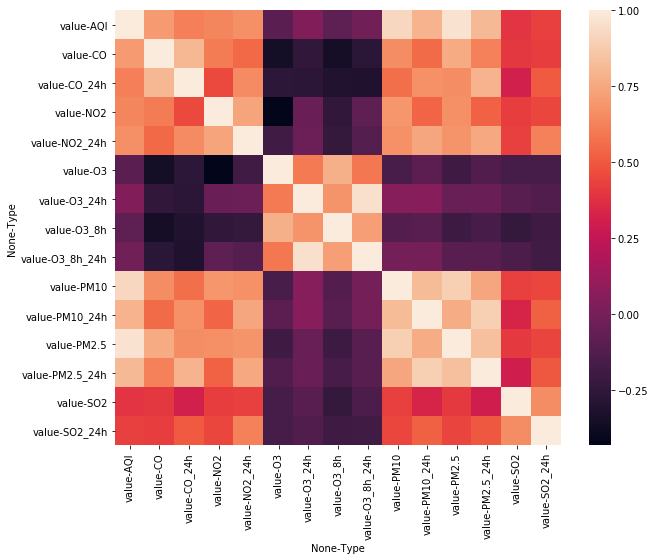

In [83]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(sub.corr())

In [230]:
# create predictors X and response y
X=sub_tt.iloc[:,1:15]
y=sub_tt.iloc[:,0]

In [308]:
# Train an SVC with linear kernel
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=8, max_features=11, random_state=123)
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=11, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=8, n_jobs=1, oob_score=False, random_state=123,
           verbose=0, warm_start=False)

In [309]:
rf.feature_importances_

array([  6.48018164e-02,   2.18115408e-04,   1.79560595e-04,
         2.60470590e-04,   2.50821517e-03,   1.88214027e-03,
         4.44968492e-02,   2.29915165e-03,   1.70044951e-01,
         2.99843071e-04,   7.12447281e-01,   3.06170936e-04,
         9.67574154e-05,   1.58677336e-04])

In [310]:
# Beautify the display of feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances

,importance
Type,
PM2.5,0.712447
PM10,0.170045
CO,0.064802
O3_8h,0.044497
O3,0.002508
O3_8h_24h,0.002299
O3_24h,0.001882
PM2.5_24h,0.000306
PM10_24h,0.000300


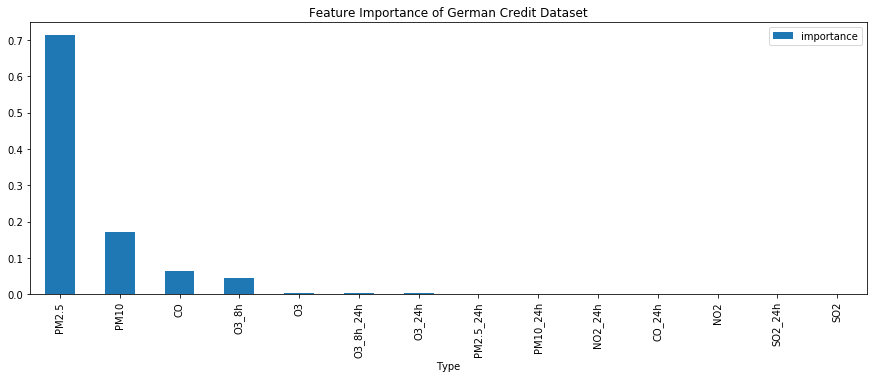

In [311]:
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance of German Credit Dataset')

In [235]:
# Fit a full model
X=X.fillna(0)
mod_full = sm.OLS(y,X).fit()

# Summarize model
mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AQI   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 5.191e+04
Date:                Tue, 24 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:45:05   Log-Likelihood:                -29952.
No. Observations:                8067   AIC:                         5.993e+04
Df Residuals:                    8053   BIC:                         6.003e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CO             7.4783      0.835      8.952      0.000       5.841       9.116
CO_24h         1.3616      1.023      1.331      0.183      -0.644       3.367
NO2           -0.0519      0.010     -5.312      0.000      -0.071      -0.033
NO2_24h        0.0344      0.012      2.783      0.005       0.010       0.059
O3             0.0031      0.005      0.605      0.545      -0.007       0.013
O3_24h        -0.0435      0.008     -5.458      0.000      -0.059      -0.028
O3_8h          0.2031      0.006     35.113      0.000       0.192       0.214
O3_8h_24h      0.0309      0.009      3.348      0.001       0.013       0.049
PM10           0.0621      0.004     14.271      0.000       0.054       0.071
PM10_24h      -0.0064      0.006     -1.126      0.260      -0.017       0.005
PM2.5          1.0479      0.008    132.707      0.000       1.032       1.063
PM2.5_24h     -0.0177      0.010     -1.713      0.087      -0.038       0.003
SO2            0.1061      0.023      4.565      0.000       0.061       0.152
SO2_24h        0.0954      0.031      3.092      0.002       0.035       0.156
==============================================================================
Omnibus:                     2375.419   Durbin-Watson:                   0.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10469.831
Skew:                           1.377   Prob(JB):                         0.00
Kurtosis:                       7.854   Cond. No.                     2.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [248]:
# Show coefficient estimates
mod_full.params

CO           7.478306
CO_24h       1.361621
NO2         -0.051898
NO2_24h      0.034414
O3           0.003136
O3_24h      -0.043492
O3_8h        0.203109
O3_8h_24h    0.030851
PM10         0.062144
PM10_24h    -0.006381
PM2.5        1.047886
PM2.5_24h   -0.017731
SO2          0.106116
SO2_24h      0.095378
dtype: float64